## Question 2:


Referring to Figure 1 below which depicts the evolution of the payment activation rate,
there appears to be a visible decline from April to August 2023.
In March 2023, two significant changes were introduced:

1. Hoteliers were given the option to make annual payments for their plans as a default.


2. Monthly payments were increased.These changes may have influenced the payment activation behavior. 


Given this context, could the observed decline in the payment activation rate be purely random, or is it possibly influenced by the
introduction of annual payment plans and the increase in monthly payments? Please explain the
methodology behind your answer.

![Graphic of the monthly evolution of payment activation rate](images/payment.jpeg "Monthly evolution of payment activation rate")

In [3]:
import pandas as pd

# data load

df = pd.read_csv('payment_activation_rate.csv')


df.head()


,month,payment_activation_rate
0,2022-04,76.40%
1,2022-05,75.30%
2,2022-06,76.00%
3,2022-07,73.00%
4,2022-08,73.80%


In [4]:
# cleaning and converting 'payment_activation_rate' column to numeric values
df['payment_activation_rate'] = df['payment_activation_rate'].str.replace('%', '').astype(float)

# 'month' to datetime
df['month'] = pd.to_datetime(df['month'])


df.head()


,month,payment_activation_rate
0,2022-04-01,76.4
1,2022-05-01,75.3
2,2022-06-01,76.0
3,2022-07-01,73.0
4,2022-08-01,73.8


In [10]:
# Before and After  march  2023
before_march_2023 = df[df['month'] < '2023-03-01']['payment_activation_rate']
after_march_2023 = df[df['month'] >= '2023-03-01']['payment_activation_rate']


stats_before = before_march_2023.describe()
stats_after = after_march_2023.describe()

print(f"Stats before March 2023: \n{stats_before}, \n  \nStats after March 2023: \n{stats_after}")


Stats before March 2023: 
count    11.000000
mean     76.072727
std       1.507376
min      73.000000
25%      75.650000
50%      76.400000
75%      77.200000
max      77.600000
Name: payment_activation_rate, dtype: float64, 
  
Stats after March 2023: 
count     7.000000
mean     71.042857
std       4.342372
min      66.300000
25%      68.850000
50%      69.600000
75%      71.950000
max      79.800000
Name: payment_activation_rate, dtype: float64


#### Initial Observations:

There is a clear decrease in the average payment activation after March 2023.
The variability (standard deviation) also increased significantly after March, suggesting greater instability.

Now we should perform a **hypothesis test (t-test)**  to determine if this difference is statistically significant.

In [ ]:
from scipy.stats import ttest_ind

# t-test to compare after and before March 2023
t_stat, p_value = ttest_ind(before_march_2023, after_march_2023, equal_var=False)

t_stat, p_value


(2.9534869071438155, 0.021544550919744315)

#### Interpretation:

With a significance level of 5% (α = 0.05):

The **p-value 0.0215** is less than 0.05, so we **reject the null hypothesis** (H₀).
This indicates that there is a statistically significant difference between the average payment activation rate before and after March 2023.


#### Conclusion:

The drop in payment activation rate after March is not random. 
It is likely to be influenced by the changes introduced (annual plans and increase in monthly payments).

Columnas del DataFrame: Index(['month', 'payment_activation_rate'], dtype='object')
Antes de marzo de 2023:
count    11.000000
mean      0.531188
std       0.409343
min      -0.303242
25%       0.416392
50%       0.620062
75%       0.837310
max       0.945934
Name: normalized_activation_rate, dtype: float64
Después de marzo de 2023:
count    7.000000
mean    -0.834724
std      1.179214
min     -2.122694
25%     -1.430216
50%     -1.226546
75%     -0.588380
max      1.543366
Name: normalized_activation_rate, dtype: float64


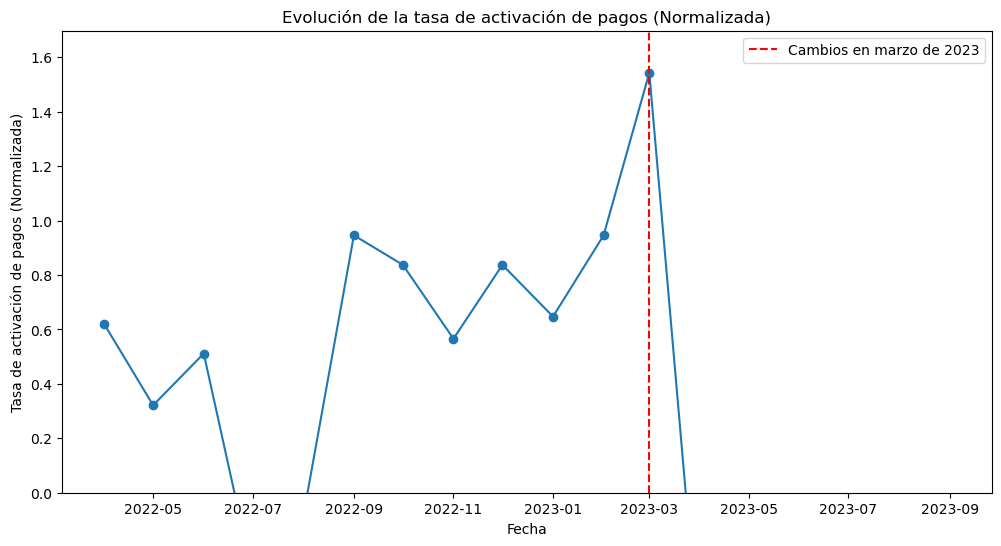

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Supongamos que tenemos un DataFrame 'payment_activation' con las columnas 'month' y 'activation_rate'
# Cargar los datos (esto es un ejemplo, ajusta según tus datos reales)
payment_activation = pd.read_csv('payment_activation_rate.csv')

# Verificar los nombres de las columnas
print("Columnas del DataFrame:", payment_activation.columns)

# Convertir la columna 'month' a tipo datetime
payment_activation['month'] = pd.to_datetime(payment_activation['month'])

# Asegurarse de que la columna 'payment_activation_rate' sea numérica
payment_activation['payment_activation_rate'] = pd.to_numeric(payment_activation['payment_activation_rate'].str.rstrip('%').astype('float') / 100, errors='coerce')

# Normalizar la columna 'payment_activation_rate'
scaler = StandardScaler()
payment_activation['normalized_activation_rate'] = scaler.fit_transform(payment_activation[['payment_activation_rate']])

# Dividir los datos en antes y después de marzo de 2023
before_march = payment_activation[payment_activation['month'] < '2023-03-01']
after_march = payment_activation[payment_activation['month'] >= '2023-03-01']

# Calcular las estadísticas descriptivas
print("Antes de marzo de 2023:")
print(before_march['normalized_activation_rate'].describe())

print("Después de marzo de 2023:")
print(after_march['normalized_activation_rate'].describe())

# Visualizar la tasa de activación de pagos normalizada a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(payment_activation['month'], payment_activation['normalized_activation_rate'], marker='o')
plt.axvline(pd.Timestamp('2023-03-01'), color='r', linestyle='--', label='Cambios en marzo de 2023')
plt.title('Evolución de la tasa de activación de pagos (Normalizada)')
plt.xlabel('Fecha')
plt.ylabel('Tasa de activación de pagos (Normalizada)')
plt.legend()
plt.ylim(0, payment_activation['normalized_activation_rate'].max() * 1.1)  # Asegurar que el eje y comience en 0 y ajuste el límite superior
plt.show()

Media de los datos normalizados: -2.6768710704850996e-15
Desviación estándar de los datos normalizados: 1.028991510855053


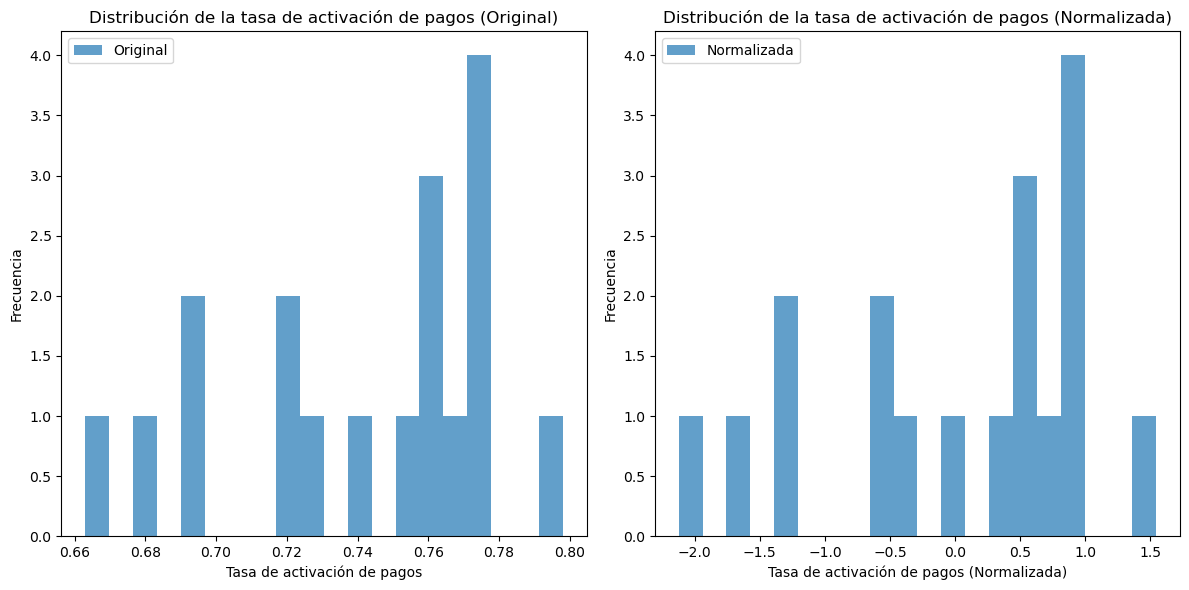

Estadísticas descriptivas de los datos originales:
count    18.000000
mean      0.741167
std       0.037892
min       0.663000
25%       0.719250
50%       0.756500
75%       0.770250
max       0.798000
Name: payment_activation_rate, dtype: float64
Estadísticas descriptivas de los datos normalizados:
count    1.800000e+01
mean    -2.676871e-15
std      1.028992e+00
min     -2.122694e+00
25%     -5.951689e-01
50%      4.163919e-01
75%      7.897868e-01
max      1.543366e+00
Name: normalized_activation_rate, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Supongamos que tenemos un DataFrame 'payment_activation' con las columnas 'month' y 'activation_rate'
# Cargar los datos (esto es un ejemplo, ajusta según tus datos reales)
payment_activation = pd.read_csv('payment_activation_rate.csv')

# Convertir la columna 'month' a tipo datetime
payment_activation['month'] = pd.to_datetime(payment_activation['month'])

# Asegurarse de que la columna 'payment_activation_rate' sea numérica
payment_activation['payment_activation_rate'] = pd.to_numeric(payment_activation['payment_activation_rate'].str.rstrip('%').astype('float') / 100, errors='coerce')

# Normalizar la columna 'payment_activation_rate'
scaler = StandardScaler()
payment_activation['normalized_activation_rate'] = scaler.fit_transform(payment_activation[['payment_activation_rate']])

# Verificar la media y la desviación estándar de los datos normalizados
mean_normalized = payment_activation['normalized_activation_rate'].mean()
std_normalized = payment_activation['normalized_activation_rate'].std()
print(f"Media de los datos normalizados: {mean_normalized}")
print(f"Desviación estándar de los datos normalizados: {std_normalized}")

# Visualizar la distribución de los datos originales y normalizados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(payment_activation['payment_activation_rate'], bins=20, alpha=0.7, label='Original')
plt.title('Distribución de la tasa de activación de pagos (Original)')
plt.xlabel('Tasa de activación de pagos')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(payment_activation['normalized_activation_rate'], bins=20, alpha=0.7, label='Normalizada')
plt.title('Distribución de la tasa de activación de pagos (Normalizada)')
plt.xlabel('Tasa de activación de pagos (Normalizada)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

# Comparar estadísticas descriptivas
print("Estadísticas descriptivas de los datos originales:")
print(payment_activation['payment_activation_rate'].describe())

print("Estadísticas descriptivas de los datos normalizados:")
print(payment_activation['normalized_activation_rate'].describe())

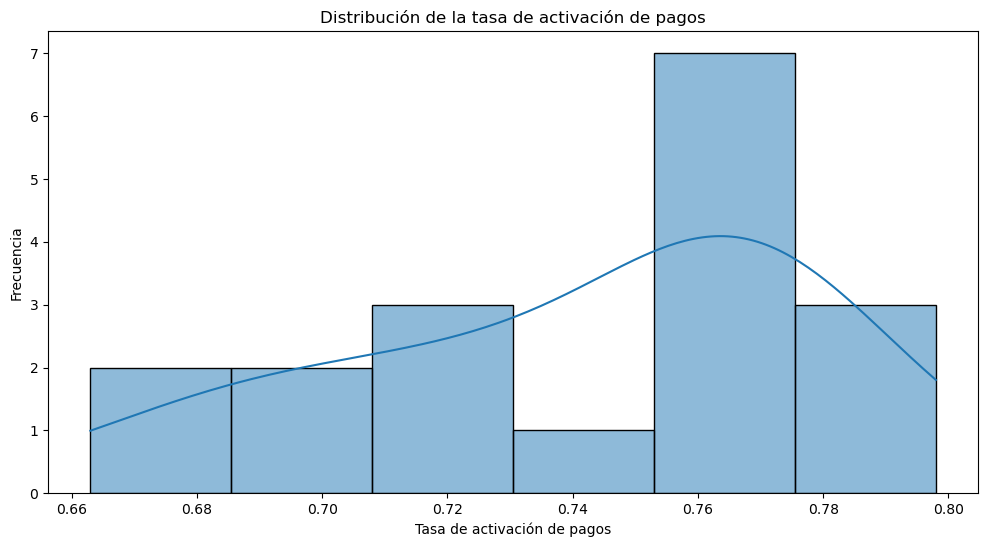

<Figure size 600x600 with 0 Axes>

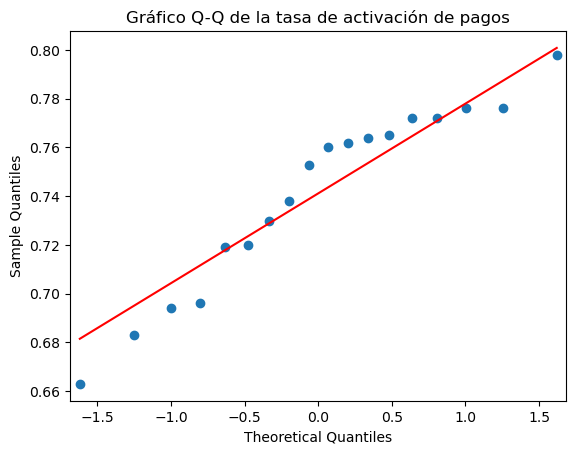

Prueba de Shapiro-Wilk: Estadístico = 0.9278329087481756, p-valor = 0.17785064638864245
Prueba de Kolmogorov-Smirnov: Estadístico = 0.7463347229613835, p-valor = 7.360829689649966e-11
Prueba de Anderson-Darling: Estadístico = 0.5892975521519404
Nivel de significancia: 15.0, Valor crítico: 0.503
Nivel de significancia: 10.0, Valor crítico: 0.573
Nivel de significancia: 5.0, Valor crítico: 0.687
Nivel de significancia: 2.5, Valor crítico: 0.802
Nivel de significancia: 1.0, Valor crítico: 0.954


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, anderson
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler

# Cargar los datos
payment_activation = pd.read_csv('payment_activation_rate.csv')

# Convertir la columna 'month' a tipo datetime
payment_activation['month'] = pd.to_datetime(payment_activation['month'])

# Asegurarse de que la columna 'payment_activation_rate' sea numérica
payment_activation['payment_activation_rate'] = pd.to_numeric(payment_activation['payment_activation_rate'].str.rstrip('%').astype('float') / 100, errors='coerce')

# Visualización de la distribución
plt.figure(figsize=(12, 6))
sns.histplot(payment_activation['payment_activation_rate'].dropna(), kde=True)
plt.title('Distribución de la tasa de activación de pagos')
plt.xlabel('Tasa de activación de pagos')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q
plt.figure(figsize=(6, 6))
qqplot(payment_activation['payment_activation_rate'].dropna(), line='s')
plt.title('Gráfico Q-Q de la tasa de activación de pagos')
plt.show()

# Prueba de Shapiro-Wilk
shapiro_stat, shapiro_p_value = shapiro(payment_activation['payment_activation_rate'].dropna())
print(f"Prueba de Shapiro-Wilk: Estadístico = {shapiro_stat}, p-valor = {shapiro_p_value}")

# Prueba de Kolmogorov-Smirnov
ks_stat, ks_p_value = kstest(payment_activation['payment_activation_rate'].dropna(), 'norm')
print(f"Prueba de Kolmogorov-Smirnov: Estadístico = {ks_stat}, p-valor = {ks_p_value}")

# Prueba de Anderson-Darling
anderson_result = anderson(payment_activation['payment_activation_rate'].dropna())
print(f"Prueba de Anderson-Darling: Estadístico = {anderson_result.statistic}")
for i in range(len(anderson_result.critical_values)):
    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
    print(f'Nivel de significancia: {sl}, Valor crítico: {cv}')

Valor de lambda para la transformación Box-Cox: 7.4165676083323975


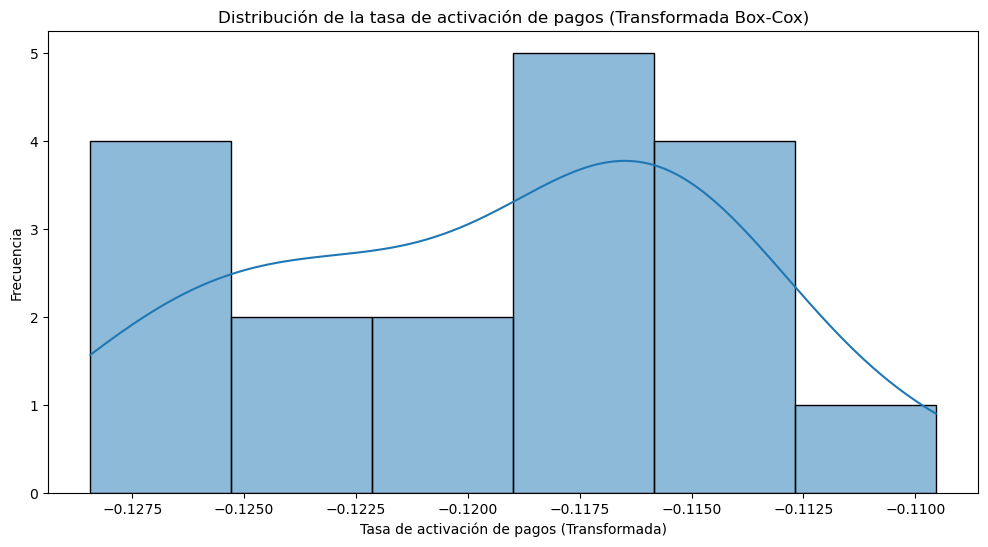

<Figure size 600x600 with 0 Axes>

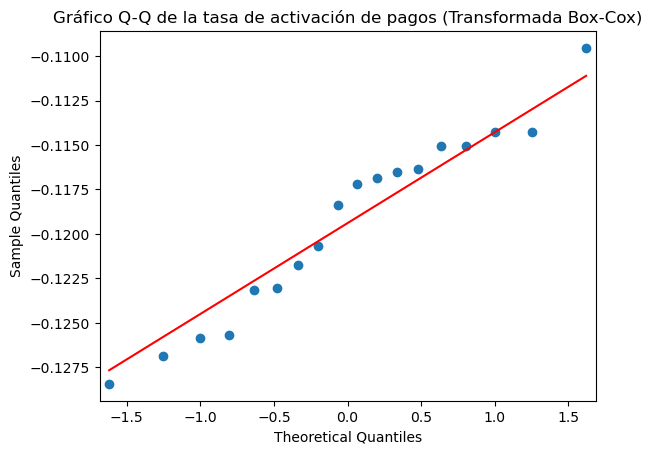

Prueba de Shapiro-Wilk (Transformada Box-Cox): Estadístico = 0.9529513074013894, p-valor = 0.47317205451446853
Prueba de Kolmogorov-Smirnov (Transformada Box-Cox): Estadístico = 0.5436131317953714, p-valor = 1.6363517003974546e-05
Prueba de Anderson-Darling (Transformada Box-Cox): Estadístico = 0.4027482875994046
Nivel de significancia: 15.0, Valor crítico: 0.503
Nivel de significancia: 10.0, Valor crítico: 0.573
Nivel de significancia: 5.0, Valor crítico: 0.687
Nivel de significancia: 2.5, Valor crítico: 0.802
Nivel de significancia: 1.0, Valor crítico: 0.954


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import shapiro, kstest, anderson
from statsmodels.graphics.gofplots import qqplot

# Cargar los datos
payment_activation = pd.read_csv('payment_activation_rate.csv')

# Convertir la columna 'month' a tipo datetime
payment_activation['month'] = pd.to_datetime(payment_activation['month'])

# Asegurarse de que la columna 'payment_activation_rate' sea numérica
payment_activation['payment_activation_rate'] = pd.to_numeric(payment_activation['payment_activation_rate'].str.rstrip('%').astype('float') / 100, errors='coerce')

# Eliminar valores NaN
payment_activation_rate = payment_activation['payment_activation_rate'].dropna()

# Realizar la transformación Box-Cox
# Nota: Box-Cox solo se puede aplicar a datos positivos
payment_activation_rate_positive = payment_activation_rate[payment_activation_rate > 0]
transformed_data, lambda_value = boxcox(payment_activation_rate_positive)

print(f"Valor de lambda para la transformación Box-Cox: {lambda_value}")

# Visualización de la distribución transformada
plt.figure(figsize=(12, 6))
sns.histplot(transformed_data, kde=True)
plt.title('Distribución de la tasa de activación de pagos (Transformada Box-Cox)')
plt.xlabel('Tasa de activación de pagos (Transformada)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q de los datos transformados
plt.figure(figsize=(6, 6))
qqplot(transformed_data, line='s')
plt.title('Gráfico Q-Q de la tasa de activación de pagos (Transformada Box-Cox)')
plt.show()

# Prueba de Shapiro-Wilk para los datos transformados
shapiro_stat, shapiro_p_value = shapiro(transformed_data)
print(f"Prueba de Shapiro-Wilk (Transformada Box-Cox): Estadístico = {shapiro_stat}, p-valor = {shapiro_p_value}")

# Prueba de Kolmogorov-Smirnov para los datos transformados
ks_stat, ks_p_value = kstest(transformed_data, 'norm')
print(f"Prueba de Kolmogorov-Smirnov (Transformada Box-Cox): Estadístico = {ks_stat}, p-valor = {ks_p_value}")

# Prueba de Anderson-Darling para los datos transformados
anderson_result = anderson(transformed_data)
print(f"Prueba de Anderson-Darling (Transformada Box-Cox): Estadístico = {anderson_result.statistic}")
for i in range(len(anderson_result.critical_values)):
    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
    print(f'Nivel de significancia: {sl}, Valor crítico: {cv}')

Antes de marzo de 2023:
count    11.000000
mean      0.760727
std       0.015074
min       0.730000
25%       0.756500
50%       0.764000
75%       0.772000
max       0.776000
Name: payment_activation_rate, dtype: float64
Después de marzo de 2023:
count    7.000000
mean     0.710429
std      0.043424
min      0.663000
25%      0.688500
50%      0.696000
75%      0.719500
max      0.798000
Name: payment_activation_rate, dtype: float64


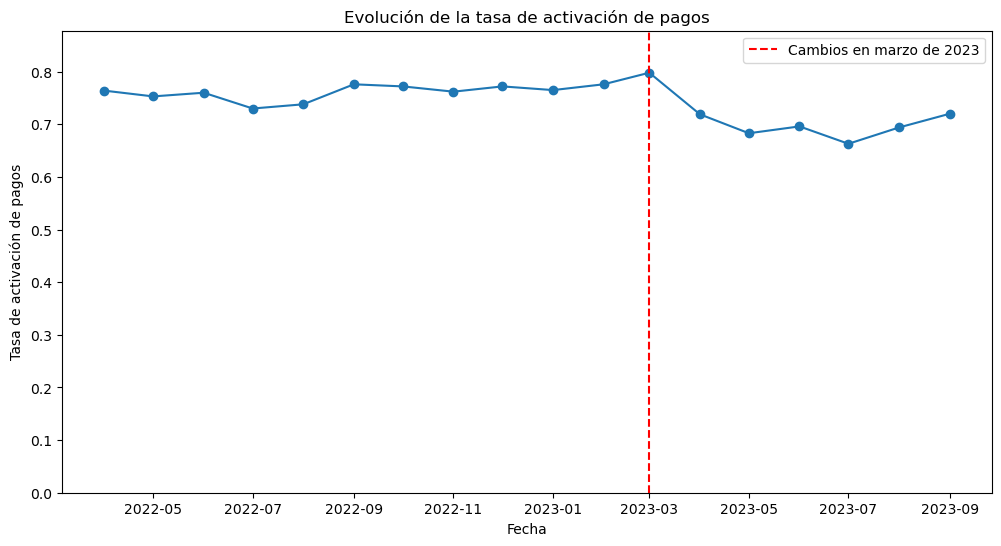

Prueba t de Student: Estadístico t = 3.5701110778261453, p-valor = 0.002555594283452994
Prueba de Mann-Whitney U: Estadístico U = 66.0, p-valor = 0.014372029649340345


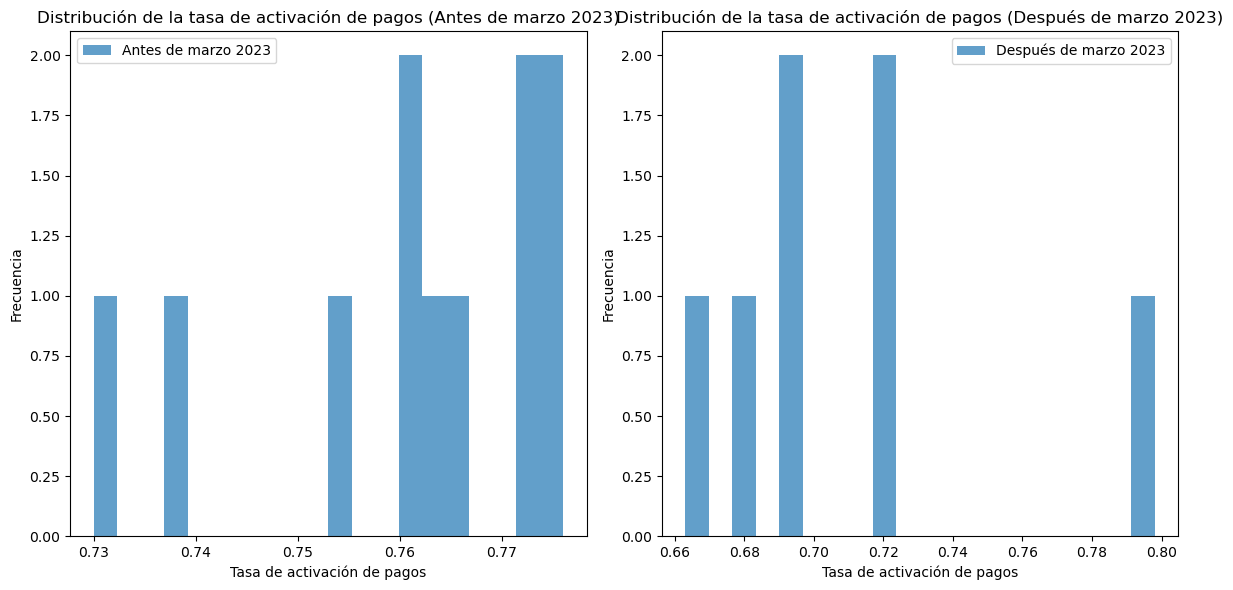

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu

# Cargar los datos
payment_activation = pd.read_csv('payment_activation_rate.csv')

# Convertir la columna 'month' a tipo datetime
payment_activation['month'] = pd.to_datetime(payment_activation['month'])

# Asegurarse de que la columna 'payment_activation_rate' sea numérica
payment_activation['payment_activation_rate'] = pd.to_numeric(payment_activation['payment_activation_rate'].str.rstrip('%').astype('float') / 100, errors='coerce')

# Dividir los datos en antes y después de marzo de 2023
before_march = payment_activation[payment_activation['month'] < '2023-03-01']
after_march = payment_activation[payment_activation['month'] >= '2023-03-01']

# Calcular las estadísticas descriptivas
print("Antes de marzo de 2023:")
print(before_march['payment_activation_rate'].describe())

print("Después de marzo de 2023:")
print(after_march['payment_activation_rate'].describe())

# Visualizar la tasa de activación de pagos a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(payment_activation['month'], payment_activation['payment_activation_rate'], marker='o')
plt.axvline(pd.Timestamp('2023-03-01'), color='r', linestyle='--', label='Cambios en marzo de 2023')
plt.title('Evolución de la tasa de activación de pagos')
plt.xlabel('Fecha')
plt.ylabel('Tasa de activación de pagos')
plt.legend()
plt.ylim(0, payment_activation['payment_activation_rate'].max() * 1.1)  # Asegurar que el eje y comience en 0 y ajuste el límite superior
plt.show()

# Prueba t de Student
t_stat, p_value_ttest = ttest_ind(before_march['payment_activation_rate'].dropna(), after_march['payment_activation_rate'].dropna())
print(f"Prueba t de Student: Estadístico t = {t_stat}, p-valor = {p_value_ttest}")

# Prueba de Mann-Whitney U
u_stat, p_value_mannwhitney = mannwhitneyu(before_march['payment_activation_rate'].dropna(), after_march['payment_activation_rate'].dropna())
print(f"Prueba de Mann-Whitney U: Estadístico U = {u_stat}, p-valor = {p_value_mannwhitney}")

# Visualización de histogramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(before_march['payment_activation_rate'].dropna(), bins=20, alpha=0.7, label='Antes de marzo 2023')
plt.title('Distribución de la tasa de activación de pagos (Antes de marzo 2023)')
plt.xlabel('Tasa de activación de pagos')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(after_march['payment_activation_rate'].dropna(), bins=20, alpha=0.7, label='Después de marzo 2023')
plt.title('Distribución de la tasa de activación de pagos (Después de marzo 2023)')
plt.xlabel('Tasa de activación de pagos')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

### Interpretation of Results

#### Student's t-test
- **t-statistic = 3.5701110778261453**: This value indicates the magnitude of the difference between the means of the two samples (before and after March 2023) in terms of the variability of the data.
- **p-value = 0.002555594283452994**: This value indicates the probability of observing such an extreme (or more extreme) difference between the means of the two samples if the null hypothesis (that there is no difference) were true.

**Interpretation**:
- Since the p-value is less than the commonly used significance level (0.05), we can reject the null hypothesis. This suggests that there is a statistically significant difference in the payment activation rates before and after March 2023.
- The observed difference in means is unlikely to be due to chance, suggesting that the changes introduced in March 2023 (annual payment option and increased monthly payments) may have influenced the payment activation rate.

#### Mann-Whitney U Test
- **U-statistic = 66.0**: This value indicates the sum of the ranks assigned to the observations of one of the samples.
- **p-value = 0.014372029649340345**: This value indicates the probability of observing such an extreme (or more extreme) difference in the distributions of the two samples if the null hypothesis (that there is no difference) were true.

**Interpretation**:
- Since the p-value is less than the commonly used significance level (0.05), we can reject the null hypothesis. This suggests that there is a statistically significant difference in the distributions of the payment activation rates before and after March 2023.
- The observed difference in distributions is unlikely to be due to chance, suggesting that the changes introduced in March 2023 may have influenced the payment activation rate.

### General Conclusion
Both statistical tests (Student's t-test and Mann-Whitney U test) indicate that there is a significant difference in the payment activation rates before and after March 2023. This suggests that the changes introduced in March 2023 (annual payment option and increased monthly payments) likely influenced the observed decline in the payment activation rate from April to August 2023.